<h1 style="text-align: center; color: RED">TELCO CUSTOMER CHURN FEATURE ENGINEERING</h1>

<span style="color: blue; font-weight: bold;">İŞ PROBLEMİ</span>

Şirketi terk edecek müşterileri tahmin edebilecek bir makine öğrenmesi modeli
geliştirilmesi istenmektedir. Modeli geliştirmeden önce gerekli olan veri analizi
ve özellik mühendisliği adımlarını gerçekleştirmeniz beklenmektedir

<span style="color: blue; font-weight: bold;">VERİ SETİ HİKAYESİ</span>

Telco müşteri kaybı verileri, üçüncü çeyrekte Kaliforniya'daki 7043 müşteriye ev telefonu ve İnternet hizmetleri sağlayan hayali
bir telekom şirketi hakkında bilgi içerir. Hangi müşterilerin hizmetlerinden ayrıldığını, kaldığını veya hizmete kaydolduğunu
gösterir.

21 Değişken 7043 Gözlem 977.5 KB

CustomerId: Müşteri İd’si

Gender: Cinsiyet

SeniorCitizen: Müşterinin yaşlı olup olmadığı (1, 0)

Partner: Müşterinin bir ortağı olup olmadığı (Evet, Hayır)

Dependents: Müşterinin bakmakla yükümlü olduğu kişiler olup olmadığı (Evet, Hayır)

tenure: Müşterinin şirkette kaldığı ay sayısı

PhoneService: Müşterinin telefon hizmeti olup olmadığı (Evet, Hayır)

MultipleLines: Müşterinin birden fazla hattı olup olmadığı (Evet, Hayır, Telefon hizmeti yok)

InternetService: Müşterinin internet servis sağlayıcısı (DSL, Fiber optik, Hayır)

OnlineSecurity: Müşterinin çevrimiçi güvenliğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)

OnlineBackup: Müşterinin online yedeğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)

DeviceProtection: Müşterinin cihaz korumasına sahip olup olmadığı (Evet, Hayır, İnternet hizmeti yok)

TechSupport: Müşterinin teknik destek alıp almadığı (Evet, Hayır, İnternet hizmeti yok)

StreamingTV: Müşterinin TV yayını olup olmadığı (Evet, Hayır, İnternet hizmeti yok)

StreamingMovies: Müşterinin film akışı olup olmadığı (Evet, Hayır, İnternet hizmeti yok)

Contract: Müşterinin sözleşme süresi (Aydan aya, Bir yıl, İki yıl)

PaperlessBilling: Müşterinin kağıtsız faturası olup olmadığı (Evet, Hayır)

PaymentMethod: Müşterinin ödeme yöntemi (Elektronik çek, Posta çeki, Banka havalesi (otomatik), Kredi kartı (otomatik))

MonthlyCharges: Müşteriden aylık olarak tahsil edilen tutar

TotalCharges: Müşteriden tahsil edilen toplam tutar

Churn: Müşterinin kullanıp kullanmadığı (Evet veya Hayır)

<h2 style="text-align: center; color: RED">PROJE GÖREVLERİ</h2>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno #eksik değerler için kullanılan bir kütüphane
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

#Görsel ayaralama için
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

<span style="color: blue; font-weight: bold;">Görev 1 : Keşifçi Veri Analizi</span>

**Adım 1:** Genel resmi inceleyiniz.

In [12]:
df = pd.read_csv("C:\\Users\\ASLI\\Desktop\\Data Scientist Bootcamp\\6.Feature Engineering\\datasets\\Telco-Customer-Churn.csv")

In [14]:
def check_df(dataframe, head = 5):
    print('##############SHAPE##############')
    print(dataframe.shape)
    print('##############TYPES##############')
    print(dataframe.dtypes)
    print('##############COLUMNS#####################')
    print(dataframe.columns)
    print('##############HEAD######################')
    print(dataframe.head(head))
    print('##############TAİL#####################')
    print(dataframe.tail(head))
    print('##############DESCRİBE##########################')
    print(dataframe.describe([0, 0.05,0.25, 0.50,0.75, 0.95, 0.99, 1]).T)
    print('##############NULL#####################')
    print(dataframe.isnull().sum())
check_df(df)

##############SHAPE##############
(7043, 21)
##############TYPES##############
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
##############COLUMNS#####################
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'Payme

**Adım 2:** Numerik ve kategorik değişkenleri yakalayınız.

In [17]:
def grab_col_names(dataframe, cat_th=10, car_th=20):#parametrelerin ön tanımlı değerlerini burda belirttik

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ['object', 'category', 'bool']]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtypes in ['int64', 'float64'] and dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ['object', 'category'] and dataframe[col].nunique() > car_th]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes  in ['int64', 'float64']] #bu sayısal değişkenleri verir
    num_cols = [col for col in num_cols if col not in cat_cols] 

    print(f'Observetions: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [19]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observetions: 7043
Variables: 21
cat_cols: 17
num_cols: 2
cat_but_car: 2
num_but_cat: 1


* TotalCharges sayısal bir değişken olmalı bu sebeple veri tipini değitiricez.

In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype(float64)

* Yukarıdaki kod:

Doğrudan tip dönüşümü yapar.
Kolondaki tüm değerlerin kesinlikle float64 tipine dönüşebilir olması gerekir.
Eğer sayıya çevrilemeyen bir değer (örneğin 'abc' ya da boş string '') varsa hata verir (ValueError).

In [34]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

* Yukarıdaki kod:

Kolondaki değerleri sayısala (int64 veya float64) dönüştürür.

errors='coerce' parametresi sayesinde sayı olmayan değerleri hata vermek yerine NaN yapar.

Veri temizleme sürecinde daha güvenli bir yöntemdir.

In [58]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observetions: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 2


In [60]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [40]:
cat_but_car

['customerID']

In [62]:
df[cat_cols].nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
SeniorCitizen       2
Churn               2
dtype: int64

In [49]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

* Churn hedef değişken olduğu için bunu 1 ve 0 ile ifade edecek hale getirelim

In [54]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [56]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

**Adım 3:** Numerik ve kategorik değişkenlerin analizini yapınız.

In [65]:
def cat_summary(dataframe, col_name, plot = False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                  'Ratio':100 * dataframe[col_name].value_counts() / dataframe.shape[0]}))
    print('###################################')

    if plot:
        sns.countplot(data=dataframe, x = dataframe[col_name])
        plt.show()

        gender  Ratio
gender               
Male      3555 50.476
Female    3488 49.524
###################################


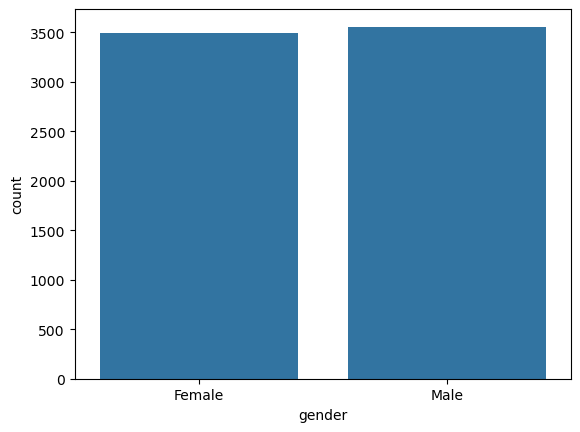

         Partner  Ratio
Partner                
No          3641 51.697
Yes         3402 48.303
###################################


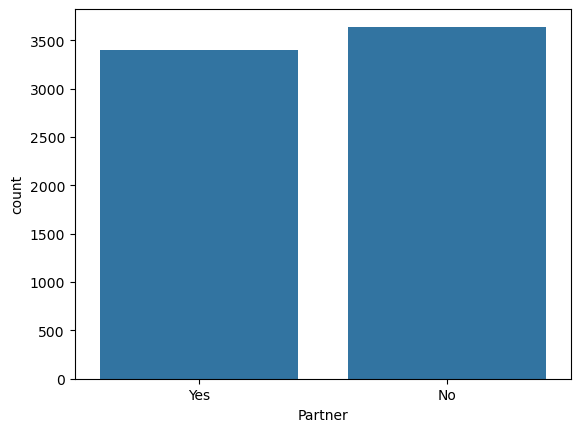

            Dependents  Ratio
Dependents                   
No                4933 70.041
Yes               2110 29.959
###################################


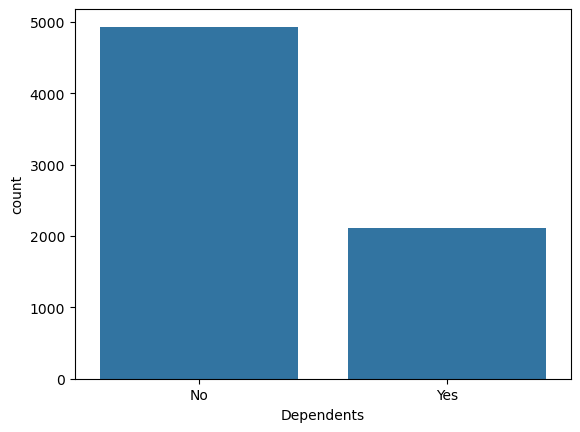

              PhoneService  Ratio
PhoneService                     
Yes                   6361 90.317
No                     682  9.683
###################################


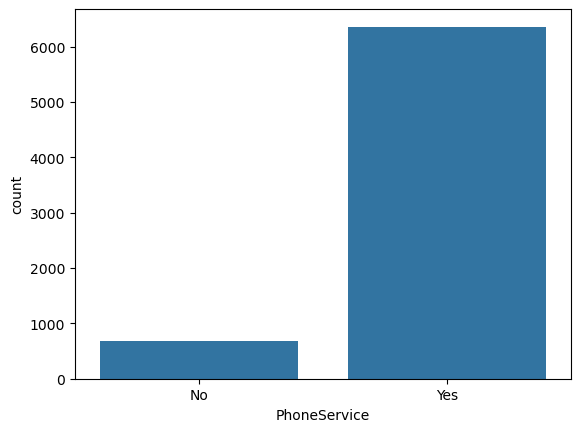

                  MultipleLines  Ratio
MultipleLines                         
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
###################################


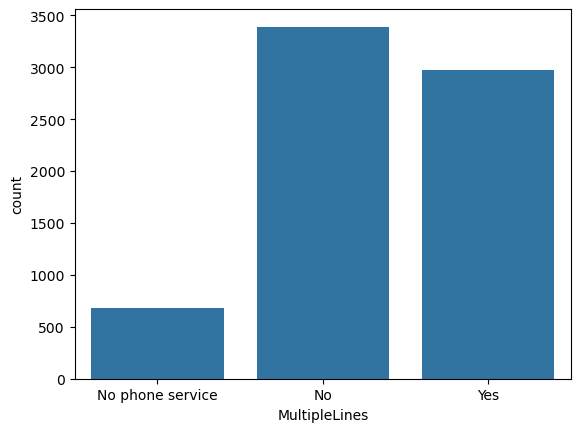

                 InternetService  Ratio
InternetService                        
Fiber optic                 3096 43.959
DSL                         2421 34.375
No                          1526 21.667
###################################


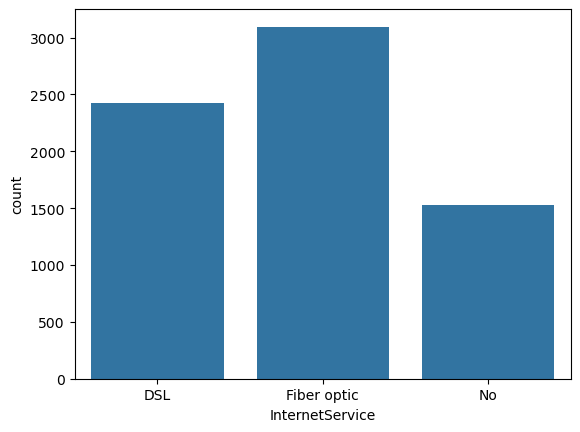

                     OnlineSecurity  Ratio
OnlineSecurity                            
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667
###################################


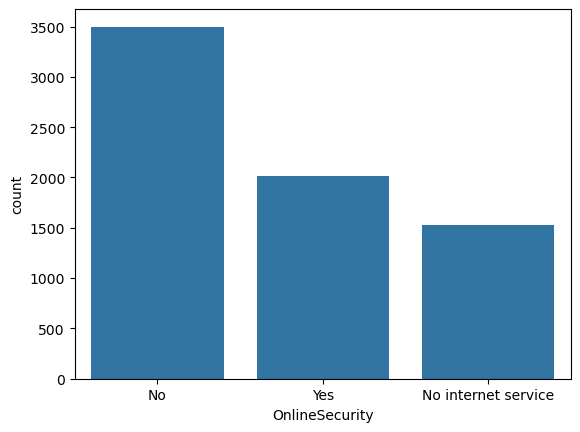

                     OnlineBackup  Ratio
OnlineBackup                            
No                           3088 43.845
Yes                          2429 34.488
No internet service          1526 21.667
###################################


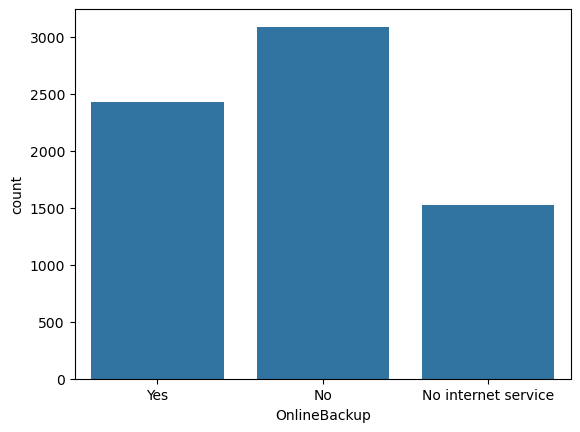

                     DeviceProtection  Ratio
DeviceProtection                            
No                               3095 43.944
Yes                              2422 34.389
No internet service              1526 21.667
###################################


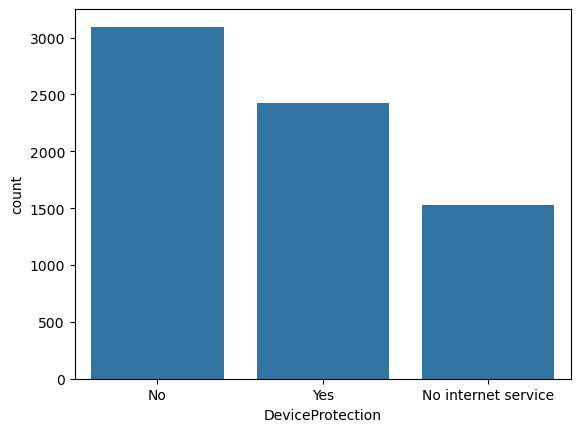

                     TechSupport  Ratio
TechSupport                            
No                          3473 49.311
Yes                         2044 29.022
No internet service         1526 21.667
###################################


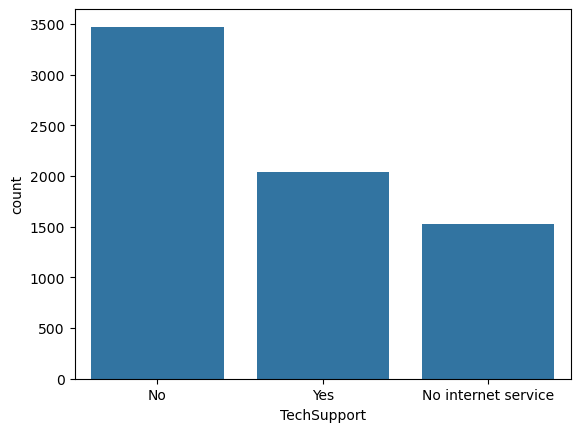

                     StreamingTV  Ratio
StreamingTV                            
No                          2810 39.898
Yes                         2707 38.435
No internet service         1526 21.667
###################################


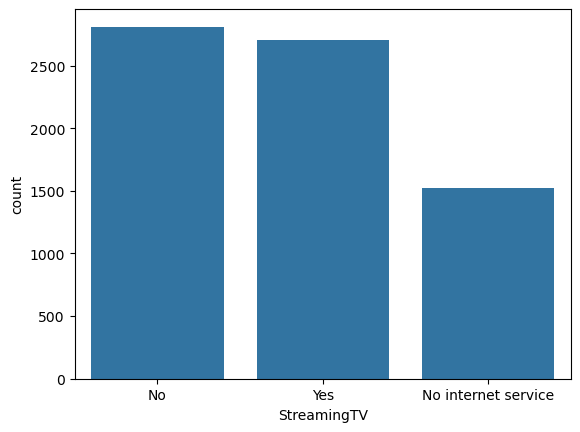

                     StreamingMovies  Ratio
StreamingMovies                            
No                              2785 39.543
Yes                             2732 38.790
No internet service             1526 21.667
###################################


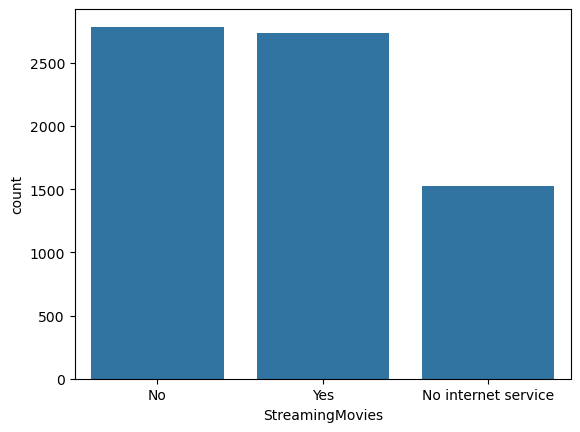

                Contract  Ratio
Contract                       
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914
###################################


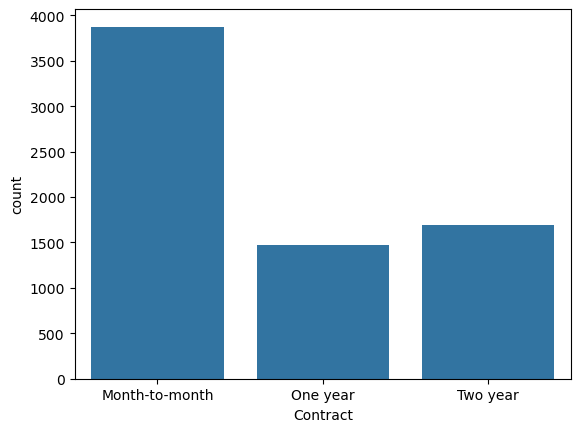

                  PaperlessBilling  Ratio
PaperlessBilling                         
Yes                           4171 59.222
No                            2872 40.778
###################################


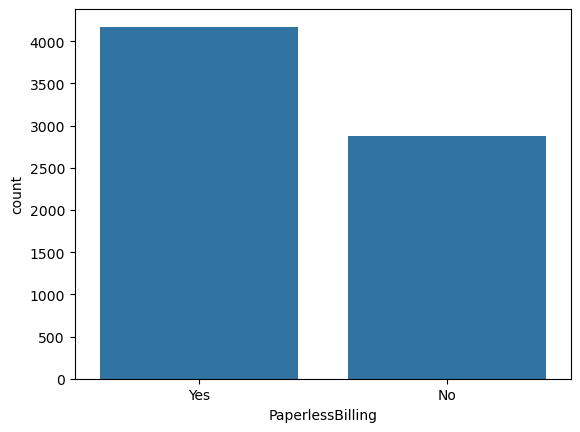

                           PaymentMethod  Ratio
PaymentMethod                                  
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610
###################################


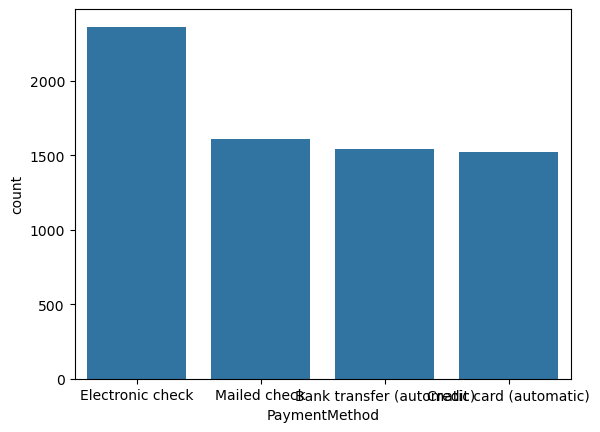

               SeniorCitizen  Ratio
SeniorCitizen                      
0                       5901 83.785
1                       1142 16.215
###################################


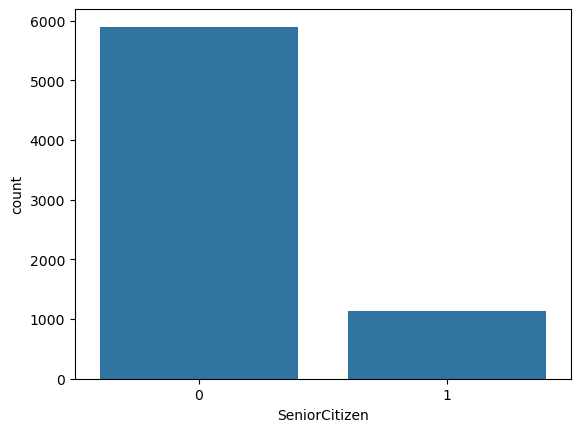

       Churn  Ratio
Churn              
0       5174 73.463
1       1869 26.537
###################################


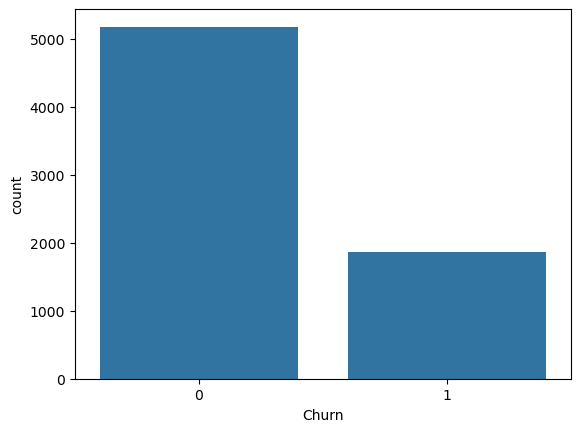

In [67]:
for col in cat_cols:
    cat_summary(df, col, plot = True)

In [71]:
def num_summary(dataframe, col_name, plot = False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.99 ]
    print(dataframe[col_name].describe(quantiles)) #sayısal değişkenlerin betimsel istatistikleri
    print('################################')

    if plot:
        plt.figure(figsize=(8, 4))
        sns.histplot(data=dataframe, x=col_name, kde=True)
        plt.title(f"{col_name} Dağılımı")
        plt.show()

count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
99%       72.000
max       72.000
Name: tenure, dtype: float64
################################


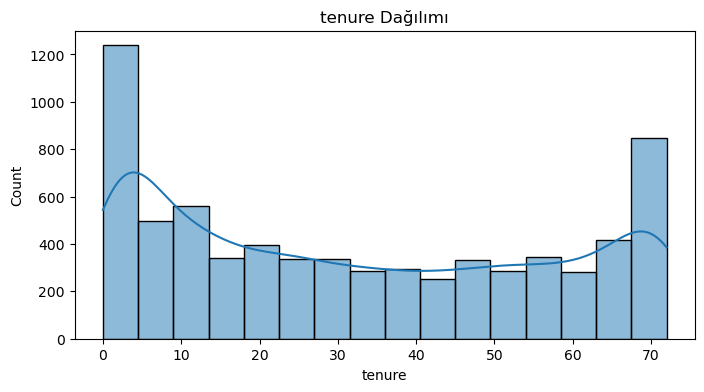

count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
99%      114.729
max      118.750
Name: MonthlyCharges, dtype: float64
################################


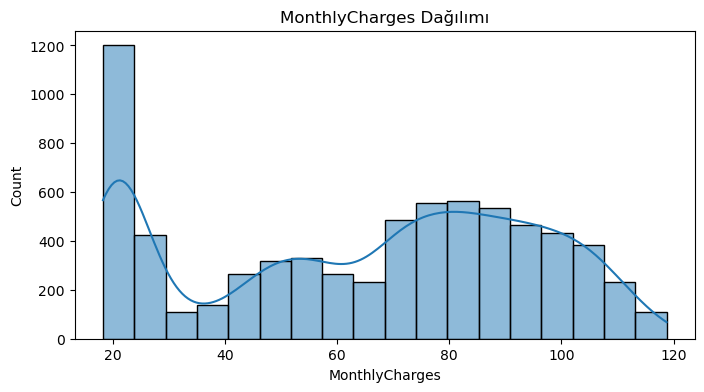

count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64
################################


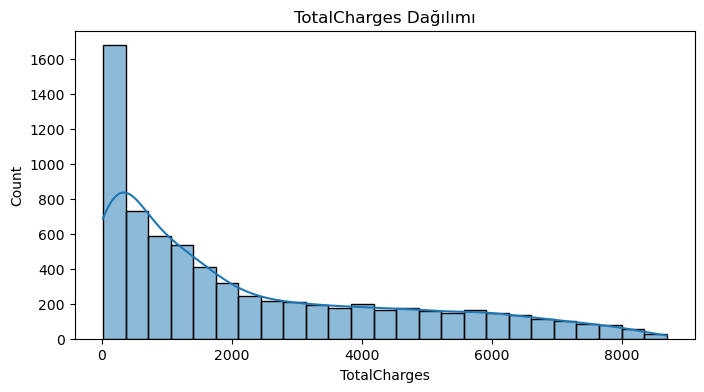

In [73]:
for col in num_cols:
    num_summary(df, col, plot = True)

**Adım 4:** Hedef değişken analizi yapınız. (Kategorik değişkenlere göre hedef değişkenin ortalaması, hedef değişkene göre
numerik değişkenlerin ortalaması)

In [78]:
def target_summary_with_num(dataframe, target, num_col):
    print(dataframe.groupby(target).agg({num_col:'mean'}))

In [82]:
for col in num_cols:
    target_summary_with_num(df, 'Churn', col)

       tenure
Churn        
0      37.570
1      17.979
       MonthlyCharges
Churn                
0              61.265
1              74.441
       TotalCharges
Churn              
0          2555.344
1          1531.796


In [84]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")



In [86]:
for col in cat_cols:
    target_summary_with_cat(df, "Churn", col)

gender
        TARGET_MEAN  Count  Ratio
gender                           
Female        0.269   3488 49.524
Male          0.262   3555 50.476


Partner
         TARGET_MEAN  Count  Ratio
Partner                           
No             0.330   3641 51.697
Yes            0.197   3402 48.303


Dependents
            TARGET_MEAN  Count  Ratio
Dependents                           
No                0.313   4933 70.041
Yes               0.155   2110 29.959


PhoneService
              TARGET_MEAN  Count  Ratio
PhoneService                           
No                  0.249    682  9.683
Yes                 0.267   6361 90.317


MultipleLines
                  TARGET_MEAN  Count  Ratio
MultipleLines                              
No                      0.250   3390 48.133
No phone service        0.249    682  9.683
Yes                     0.286   2971 42.184


InternetService
                 TARGET_MEAN  Count  Ratio
InternetService                           
DSL                    0.19

* Yukarıdaki çıktının yorumu:

Genel Bakış

Churn oranı (müşteri kaybı): %26,5
Yani yaklaşık her 4 müşteriden 1’i hizmeti bırakıyor. Bu oran, telekom sektörü için yüksek sayılabilecek bir değer.

***Sözleşme Türü (Contract)***

Month-to-month müşterilerin churn oranı %42,7 → En riskli grup.

One year: %11,3

Two year: %2,8 → En düşük churn.

Yorum: Uzun süreli sözleşmeler churn riskini ciddi şekilde azaltıyor. Sadakati artırmak için müşterilere uzun vadeli plan teşvikleri sunulmalı.

***İnternet Servis Türü (InternetService)***

Fiber optic kullanıcılarında churn %41,9 → DSL kullanıcılarının (%19) iki katından fazla.

İnternet hizmeti olmayanlarda churn çok düşük (%7,4) çünkü bunlar muhtemelen sadece telefon müşterisi ve daha az rekabet baskısı altında.

Yorum: Fiber kullanıcılarında fiyat, hız veya hizmet kalitesi problemleri olabilir. Bu segment ayrıca daha talepkar olabilir.

***Ek Hizmetler (OnlineSecurity, TechSupport vb.)***

Güvenlik ve teknik destek hizmetleri olmayan müşterilerde churn %39–41 civarında.

Bu hizmetleri kullanan müşterilerde churn oranı %14–22’ye düşüyor.

Yorum: Ek hizmetler, müşteri bağlılığını artırıyor. Paket satış stratejisi churn’ü azaltabilir.

***Ödeme Yöntemi (PaymentMethod)***

Electronic check kullananlarda churn oranı %45,3 → En yüksek risk.

Otomatik ödeme (banka transferi veya kredi kartı) kullananlarda churn %15–17.

Yorum: Manuel ödeme yapanlar aboneliği kolayca iptal edebiliyor. Otomatik ödeme teşvik edilmeli.

***Demografi***

SeniorCitizen (yaşlı) müşterilerde churn %41,7; gençlerde %23,6.

Partner ve Dependents olanlarda churn daha düşük (Partner yok: %33, Dependents yok: %31).

Yorum: Yalnız yaşayan ve yaşı yüksek müşteriler daha yüksek churn riski taşıyor.

***Faturalandırma (PaperlessBilling)***

E-fatura (Yes) kullananlarda churn %33,6; kağıt faturalarda %16,3.

Yorum: E-fatura kullanıcıları daha dijital odaklı, rekabetçi tekliflere daha açık olabilir. Bu grup için ekstra sadakat kampanyaları gerekebilir.

**Adım 5:** Aykırı gözlem analizi yapınız.

In [136]:
def outlier_tresholds(dataframe, col_name, q1=0.05, q3=0.95):
    q1 = dataframe[col_name].quantile(q1)
    q3 = dataframe[col_name].quantile(q3)
    IQR = q3 -q1
    up_limit = q3 + 1.5*IQR
    low_limit = q1 - 1.5*IQR
    return low_limit, up_limit

In [138]:
def check_outliers(dataframe, col_name):
    low_limit, up_limit = outlier_tresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] < low_limit)|(dataframe[col_name] > up_limit)].any(axis=None):
        return True
    else:
        return False

In [140]:
for col in num_cols:
    print(col,check_outliers(df, col))

tenure False
MonthlyCharges False
TotalCharges False


**Adım 6:** Eksik gözlem analizi yapınız.

In [102]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [104]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

na_columns = missing_values_table(df, na_name=True)

              n_miss  ratio
TotalCharges      11  0.160


**Adım 7:** Korelasyon analizi yapınız.

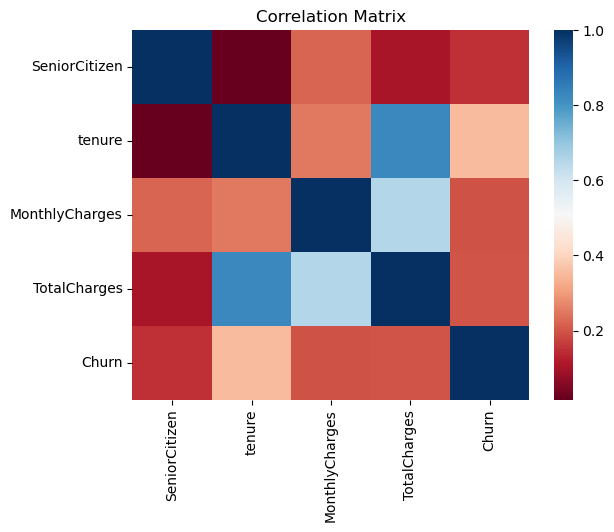

[]

In [119]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr_matrix = dataframe.select_dtypes(include='number').corr().abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.heatmap(corr_matrix, cmap="RdBu", annot=False)
        plt.title("Correlation Matrix")
        plt.show()

    return drop_list

drop_list = high_correlated_cols(df, plot=True)
drop_list

* Yaş ve TotalCharges arasında yüksek korelasyon var!!!

<span style="color: blue; font-weight: bold;"> Görev 2 : Feature Engineering</span>

**Adım 1:** Eksik ve aykırı gözlemler için gerekli işlemleri yapınız.

* Aykırı değer olmadıgı için herhangi bir işlem yapmadık.

* Eksik değer TotalCharges değişkeninde vardı. 11 tane oldugu için veri setinden silinebilir median ile doldurulabilir.

In [127]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [129]:
missing_values_table(df, na_name=True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


[]

**Adım 2:** Yeni değişkenler oluşturunuz.

In [134]:
# Tenure  değişkeninden yıllık kategorik değişken oluşturma
df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"

In [142]:
# Kontratı 1 veya 2 yıllık müşterileri Engaged olarak belirtme
df["NEW_Engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)




In [144]:
# Herhangi bir destek, yedek veya koruma almayan kişiler
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)


In [146]:
# Aylık sözleşmesi bulunan ve genç olan müşteriler
df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)

In [148]:
# Kişinin toplam aldığı servis sayısı
df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)

In [150]:
# Herhangi bir streaming hizmeti alan kişiler
df["NEW_FLAG_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["StreamingTV"] == "Yes") or (x["StreamingMovies"] == "Yes") else 0, axis=1)

In [152]:
# Kişi otomatik ödeme yapıyor mu?
df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)

In [154]:
# ortalama aylık ödeme
df["NEW_AVG_Charges"] = df["TotalCharges"] / (df["tenure"] + 1)

In [156]:
# Güncel Fiyatın ortalama fiyata göre artışı
df["NEW_Increase"] = df["NEW_AVG_Charges"] / df["MonthlyCharges"]

In [158]:
# Servis başına ücret
df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 1)

In [162]:
df.shape

(7043, 31)

In [164]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,NEW_TENURE_YEAR,NEW_Engaged,NEW_noProt,NEW_Young_Not_Engaged,NEW_TotalServices,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AutoPayment,NEW_AVG_Charges,NEW_Increase,NEW_AVG_Service_Fee
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,0-1 Year,0,1,1,1,0,0,14.925,0.500,14.925
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,2-3 Year,1,1,0,3,0,0,53.986,0.948,14.238
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,0-1 Year,0,1,1,3,0,0,36.050,0.669,13.463
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,3-4 Year,1,1,0,3,0,1,40.016,0.946,10.575
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,0-1 Year,0,1,1,1,0,0,50.550,0.715,35.350


In [166]:
df.columns = [col.upper() for col in df.columns]

In [168]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observetions: 7043
Variables: 31
cat_cols: 24
num_cols: 6
cat_but_car: 1
num_but_cat: 8


**Adım 3:** Encoding işlemlerini gerçekleştiriniz.

In [175]:
#label encoding
binary_cols = [col for col in df. columns if df[col].dtype not in ['int64','float64','int32','float32'] and df[col].nunique()==2]

In [177]:
binary_cols

['GENDER', 'PARTNER', 'DEPENDENTS', 'PHONESERVICE', 'PAPERLESSBILLING']

In [181]:
df[binary_cols].nunique()

GENDER              2
PARTNER             2
DEPENDENTS          2
PHONESERVICE        2
PAPERLESSBILLING    2
dtype: int64

In [183]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[col] = labelencoder.fit_transform(dataframe[col])
    return dataframe

In [185]:
for col in binary_cols:
    df = label_encoder(df, col)

In [187]:
#Rare encoder
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [189]:
rare_analyser(df, "CHURN", cat_cols)

GENDER : 2
        COUNT  RATIO  TARGET_MEAN
GENDER                           
0        3488  0.495        0.269
1        3555  0.505        0.262


PARTNER : 2
         COUNT  RATIO  TARGET_MEAN
PARTNER                           
0         3641  0.517        0.330
1         3402  0.483        0.197


DEPENDENTS : 2
            COUNT  RATIO  TARGET_MEAN
DEPENDENTS                           
0            4933  0.700        0.313
1            2110  0.300        0.155


PHONESERVICE : 2
              COUNT  RATIO  TARGET_MEAN
PHONESERVICE                           
0               682  0.097        0.249
1              6361  0.903        0.267


MULTIPLELINES : 3
                  COUNT  RATIO  TARGET_MEAN
MULTIPLELINES                              
No                 3390  0.481        0.250
No phone service    682  0.097        0.249
Yes                2971  0.422        0.286


INTERNETSERVICE : 3
                 COUNT  RATIO  TARGET_MEAN
INTERNETSERVICE                           
DSL

In [191]:
ohe_cols = [col for col in df.columns if 10>= df[col].nunique()>2]

In [193]:
def one_hot_encoder(dataframe, cat_col, drop_first=True):
    dataframe = pd.get_dummies(dataframe,columns = cat_col, drop_first = drop_first)
    return dataframe

In [195]:
df = one_hot_encoder(df, ohe_cols)

In [197]:
df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,PAPERLESSBILLING,MONTHLYCHARGES,TOTALCHARGES,CHURN,NEW_ENGAGED,NEW_NOPROT,NEW_YOUNG_NOT_ENGAGED,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AUTOPAYMENT,NEW_AVG_CHARGES,NEW_INCREASE,NEW_AVG_SERVICE_FEE,MULTIPLELINES_No phone service,MULTIPLELINES_Yes,INTERNETSERVICE_Fiber optic,INTERNETSERVICE_No,ONLINESECURITY_No internet service,ONLINESECURITY_Yes,ONLINEBACKUP_No internet service,ONLINEBACKUP_Yes,DEVICEPROTECTION_No internet service,DEVICEPROTECTION_Yes,TECHSUPPORT_No internet service,TECHSUPPORT_Yes,STREAMINGTV_No internet service,STREAMINGTV_Yes,STREAMINGMOVIES_No internet service,STREAMINGMOVIES_Yes,CONTRACT_One year,CONTRACT_Two year,PAYMENTMETHOD_Credit card (automatic),PAYMENTMETHOD_Electronic check,PAYMENTMETHOD_Mailed check,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year,NEW_TOTALSERVICES_1,NEW_TOTALSERVICES_2,NEW_TOTALSERVICES_3,NEW_TOTALSERVICES_4,NEW_TOTALSERVICES_5,NEW_TOTALSERVICES_6,NEW_TOTALSERVICES_7
0,7590-VHVEG,0,0,1,0,1,0,1,29.850,29.850,0,0,1,1,0,0,14.925,0.500,14.925,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.950,1889.500,0,1,1,0,0,0,53.986,0.948,14.238,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False
2,3668-QPYBK,1,0,0,0,2,1,1,53.850,108.150,1,0,1,1,0,0,36.050,0.669,13.463,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
3,7795-CFOCW,1,0,0,0,45,0,0,42.300,1840.750,0,1,1,0,0,1,40.016,0.946,10.575,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.700,151.650,1,0,1,1,0,0,50.550,0.715,35.350,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False


**Adım 4:** Numerik değişkenler için standartlaştırma yapınız.

In [202]:
scaler = StandardScaler()

In [204]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [206]:
df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,PAPERLESSBILLING,MONTHLYCHARGES,TOTALCHARGES,CHURN,NEW_ENGAGED,NEW_NOPROT,NEW_YOUNG_NOT_ENGAGED,NEW_FLAG_ANY_STREAMING,NEW_FLAG_AUTOPAYMENT,NEW_AVG_CHARGES,NEW_INCREASE,NEW_AVG_SERVICE_FEE,MULTIPLELINES_No phone service,MULTIPLELINES_Yes,INTERNETSERVICE_Fiber optic,INTERNETSERVICE_No,ONLINESECURITY_No internet service,ONLINESECURITY_Yes,ONLINEBACKUP_No internet service,ONLINEBACKUP_Yes,DEVICEPROTECTION_No internet service,DEVICEPROTECTION_Yes,TECHSUPPORT_No internet service,TECHSUPPORT_Yes,STREAMINGTV_No internet service,STREAMINGTV_Yes,STREAMINGMOVIES_No internet service,STREAMINGMOVIES_Yes,CONTRACT_One year,CONTRACT_Two year,PAYMENTMETHOD_Credit card (automatic),PAYMENTMETHOD_Electronic check,PAYMENTMETHOD_Mailed check,NEW_TENURE_YEAR_1-2 Year,NEW_TENURE_YEAR_2-3 Year,NEW_TENURE_YEAR_3-4 Year,NEW_TENURE_YEAR_4-5 Year,NEW_TENURE_YEAR_5-6 Year,NEW_TOTALSERVICES_1,NEW_TOTALSERVICES_2,NEW_TOTALSERVICES_3,NEW_TOTALSERVICES_4,NEW_TOTALSERVICES_5,NEW_TOTALSERVICES_6,NEW_TOTALSERVICES_7
0,7590-VHVEG,0,0,1,0,-1.277,0,1,-1.160,-0.994,0,0,1,1,0,0,-0.758,-0.238,-0.311,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
1,5575-GNVDE,1,0,0,0,0.066,1,0,-0.260,-0.173,0,1,1,0,0,0,-0.118,-0.010,-0.410,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False
2,3668-QPYBK,1,0,0,0,-1.237,1,1,-0.363,-0.960,1,0,1,1,0,0,-0.412,-0.152,-0.522,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
3,7795-CFOCW,1,0,0,0,0.514,0,0,-0.747,-0.195,0,1,1,0,0,1,-0.347,-0.011,-0.939,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,-1.237,1,1,0.197,-0.940,1,0,1,1,0,0,-0.174,-0.129,2.636,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
